In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#using an array of string to store the names
firstNames = ['fatima','aj','kobi','wendy','sophia','yinda','tete','sope','keisha','george']
matnos = ['0000','1111','2222','3333','4444','5555','6666','7777','8888','9999']

In [3]:
#function to get username index
def verify(arr, target):
    try:
        index = arr.index(target)
        return index
    except ValueError:
        return -1

In [4]:
#function to get image format
def image(name):
    path = 'img/' + name + '.jpeg'
    img = cv2.imread(path)
    
    formats = ['png', 'jpg', 'jpeg']
    for i in formats:
        #to ensure we get the write format in file
        currentPath = 'img/' + name + '.' + i
        img = cv2.imread(path)
        #use this to display img in grayscale mode
        # img = cv2.imread(path,0)
        if img is None:
            continue

    return img

In [5]:
def plotOriginal(image):
    #plot the original img
    plt.subplot(1,2,1)
    plt.title("original")
    plt.imshow(image)

In [6]:
def plotOthers(image,title):
    plt.subplot(1,2,2)
    plt.title(title)
    plt.imshow(image)

In [16]:
def visualiseColorSpaces(image):
    channel = int(input('Enter: \n1 to see blue,\n2 to see green, \n3 to see red\n'))
    B,G,R = cv2.split(image)
    if(channel == 1):
        plotOthers(B,"Blue")
    elif(channel == 2):
        plotOthers(G,"Green")
    elif(channel == 3):
        plotOthers(R,"Red")
    else:
        return "Entered invalid value, Process terminated"
    return "Process successful"

In [17]:
def addition(image1):
    image2 = cv2.imread('img/lotanna.jpeg')

    image1 = cv2.resize(image1, (500,400))
    image2 = cv2.resize(image2, (500,400))

    addImage = cv2.addWeighted(image1, 0.5, image2, 0.5, 0)

    plotOthers(addImage,"Addition")

In [18]:
def subtraction(image1):
    image2 = cv2.imread('img/lotanna.jpeg')

    image1 = cv2.resize(image1, (500,400))
    image2 = cv2.resize(image2, (500,400))

    sub = cv2.subtract(image1, image2)

    plotOthers(sub,"Subtraction")
    return "Process successful"
    

In [19]:
def brightnessAndContrast(image):
    brightness = 5
    contrast = 1.5
    image2 = cv2.addWeighted(image, contrat, np.zeros(image.shape, image.dtype), 0, brightness)

    #plot it
    plotOthers(image2,"Brightness and Contrast")
    return "Process successful"

In [20]:
def sharpening(image):
    kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
    image2 = cv2.filter2D(image, -1, kernel)
    plotOthers(image2,"Sharpened")
    return "Process successful"

In [21]:
def removeNoise(image):
    image2 = cv2.medianBlur(image, 15)
    plotOthers(image2, "MEDIAN Blur")
    return "Process successful"
    

In [22]:
def scaling(image):
    image2 = cv2.resize(image,None, fx=2, fy=2)
    plotOthers(image2, "Scaled")
    return "Process successful"
    

In [23]:
def inverse(image):
    image2 = 255-image
    plotOthers(image2, "Inverse Color")
    return "Process successful"
    

Enter username (all small letters):  sope
Enter matriculation number:  7777


sope 7777 logged in successfully


Enter a number to perform an operation: 
1 to visualise color spaces,
2 to add images,
3 to subtract images,
4 for brightness and contrast, 
5 for sharpening, 
6 to remove noise, 
7 to scale and, 
8 to inverse
 1
Enter: 
1 to see blue,
2 to see green, 
3 to see red
 1


'sope logged in successfully'

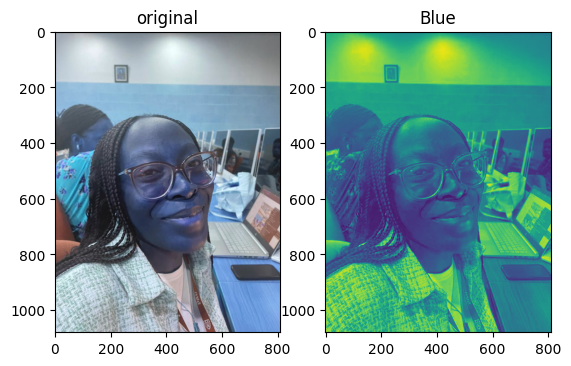

In [28]:
def login():
    username = input('Enter username (all small letters): ')
    matric = input('Enter matriculation number: ')

    #getting index of user if user exists
    validUser = verify(firstNames, username)
    
    #ending process if username is invalid
    if(validUser == -1):
        return "Invalid Username. Process terminated"

    #userName is valid
    
    #getting lastname
    userMat = matnos[validUser]

    if(matric != userMat):
        return "Invalid password. Process terminated"

    print(username+" "+matric + " logged in successfully")

    #using the image function to end process if image cant be gotten
    img = image(username)
    if img is None:
        return "Error: Could not read the image."

    operation = int(input('Enter a number to perform an operation: \n1 to visualise color spaces,\n2 to add images,\n3 to subtract images,\n4 for brightness and contrast, \n5 for sharpening, \n6 to remove noise, \n7 to scale and, \n8 to inverse\n'))
    plotOriginal(img)
    if(operation == 1):
        visualiseColorSpaces(img)
    elif(operation == 2):
        addition(img)
    elif(operation == 3):
        subtraction(img)
    elif(operation == 4):
        brightnessAndContrast(img)
    elif(operation == 5):
        sharpening(img)
    elif(operation == 6):
        removeNoise(img)
    elif(operation == 7):
        scaling(img)
    elif(operation == 8):
        inverse(img)

    #remove/delete created GUI window from screen and memory
    cv2.destroyAllWindows()

    return username+ " logged in successfully"

login()
